## Illustrative example on NMF (Non-negative Matrix Factorization)

NMF factorizes a non-negative matrix $V$ into two non-negative matrices $W$ and $H$, such that:

$$V\approx WH$$

where

$V$: original data matrix (e.g., a grayscale image)  
$W$: basis matrix (e.g., building blocks or features)  
$H$: coefficients matrix (e.g., weights to combine features)

The non-negativity constraint makes the components additive and interpretable.

NMF for Image Compression: Intuitive Example
--------------------------------------------
Let’s use a grayscale image and show how NMF can approximate it using fewer components.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import os
import ipywidgets as widgets
from IPython.display import display, clear_output

In [6]:
def load_grayscale_image(image_path, resize_shape=(100, 100)):
    img = imread(image_path, as_gray=True)
    #if img.ndim == 3:  # RGB
    #    img = rgb2gray(img)
    img_resized = resize(img, resize_shape, anti_aliasing=True)
    return img_resized

def apply_nmf(image, n_components):
    model = NMF(n_components=n_components, init='random', random_state=42, max_iter=500)
    W = model.fit_transform(image)
    H = model.components_
    reconstructed = np.dot(W, H)
    return reconstructed

def plot_reconstructions(original, reconstructions, components_list):
    n = len(reconstructions)
    plt.figure(figsize=(4 * (n + 1), 4))

    # Plot original
    plt.subplot(1, n + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Plot reconstructions
    for i, (recon, k) in enumerate(zip(reconstructions, components_list)):
        plt.subplot(1, n + 1, i + 2)
        plt.imshow(recon, cmap='gray')
        plt.title(f"{k} components")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_comparison(original, reconstructed, n_components):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f"Reconstructed ({n_components} components)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()



/home/willy/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/home/willy/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/home/willy/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/home/willy/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


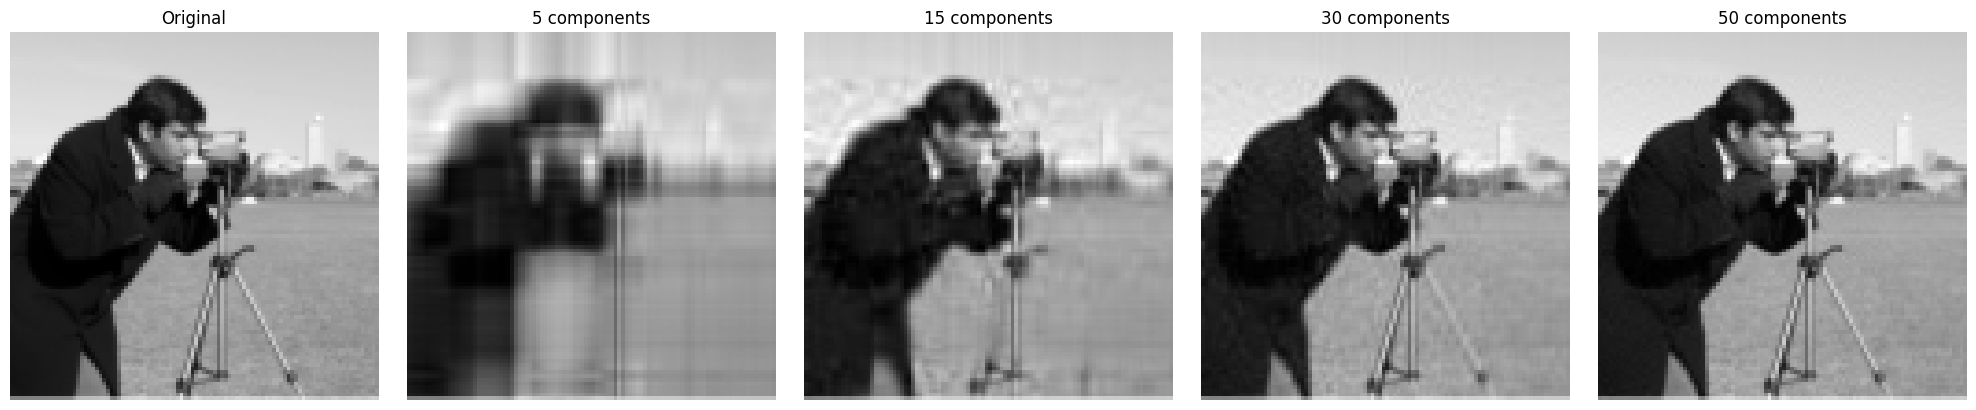

In [7]:
image_path = 'images/05-Image_for_testing.png'  # Replace with your path to an image
resize_shape = (100, 100)      # Resize for speed (adjust as needed)
components_list = [5, 15, 30, 50]  # Try different compression levels

# --- Run the Demo ---
if os.path.exists(image_path):
    original_img = load_grayscale_image(image_path, resize_shape)
    reconstructions = [apply_nmf(original_img, k) for k in components_list]
    plot_reconstructions(original_img, reconstructions, components_list)
else:
    print(f"Image not found at {image_path}")





In [ ]:
# --- Image path and setup ---
image_path = 'images/05-Image_for_testing.png'  # Replace with your image path
resize_shape = (100, 100)

# Load image
original_image = load_grayscale_image(image_path, resize_shape)

# --- Interactive widget ---
@widgets.interact(n_components=widgets.IntSlider(min=2, max=100, step=1, value=20, description='Components'))
def update_plot(n_components):
    clear_output(wait=True)
    reconstructed_image = apply_nmf(original_image, n_components)
    
    plot_comparison(original_image, reconstructed_image, n_components)



interactive(children=(IntSlider(value=20, description='Components', min=2), Output()), _dom_classes=('widget-i…